In [1]:
import numpy as np
import pandas as pd

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [19]:
df = pd.read_csv("data.csv")

In [20]:
df

,Date,TouristNumber
0,33604,8414
1,33635,9767
2,33664,13805
3,33695,12987
4,33725,32190
...,...,...
283,42217,82593
284,42248,53472
285,42278,30361
286,42309,25436


In [21]:
# 1. setting correct format for date time data

<AxesSubplot:xlabel='ds'>

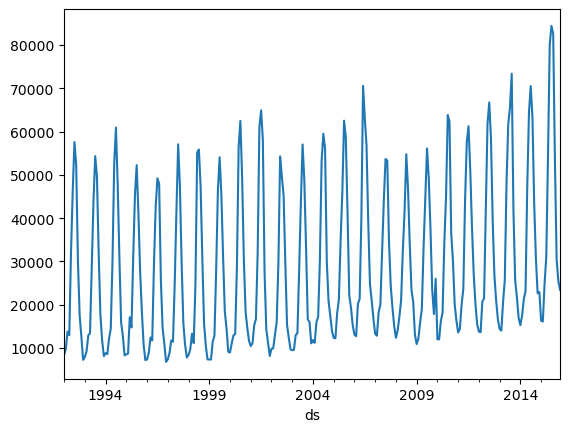

In [22]:
# Create 'ds' column and plot
df['ds'] = pd.date_range(start='1992-01-01', periods=288, freq='M')
df.set_index('ds')['TouristNumber'].plot()

In [23]:
df

,Date,TouristNumber,ds
0,33604,8414,1992-01-31
1,33635,9767,1992-02-29
2,33664,13805,1992-03-31
3,33695,12987,1992-04-30
4,33725,32190,1992-05-31
...,...,...,...
283,42217,82593,2015-08-31
284,42248,53472,2015-09-30
285,42278,30361,2015-10-31
286,42309,25436,2015-11-30


In [24]:
print(df['ds'].dtype)


datetime64[ns]


In [25]:
# 2. Setting column df as index

In [26]:
df = df.set_index('ds')
df

,Date,TouristNumber
ds,,
1992-01-31,33604,8414
1992-02-29,33635,9767
1992-03-31,33664,13805
1992-04-30,33695,12987
1992-05-31,33725,32190
...,...,...
2015-08-31,42217,82593
2015-09-30,42248,53472
2015-10-31,42278,30361


In [27]:
df.drop('Date', axis=1, inplace=True) 
df

,TouristNumber
ds,
1992-01-31,8414
1992-02-29,9767
1992-03-31,13805
1992-04-30,12987
1992-05-31,32190
...,...
2015-08-31,82593
2015-09-30,53472
2015-10-31,30361


In [18]:
# 3. Draw a line plot with x as date and y as tourist number

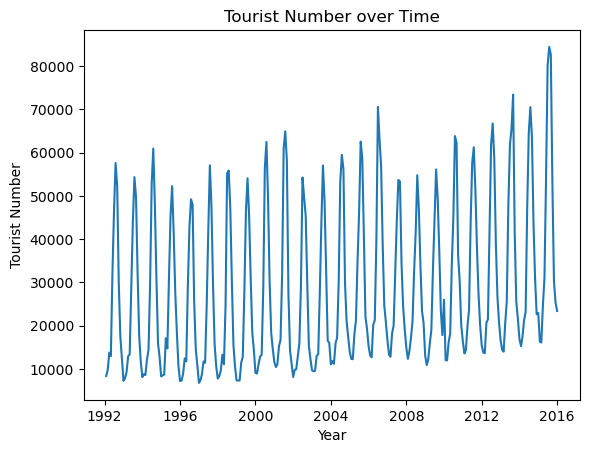

In [29]:
# create a line plot
plt.plot(df.index, df['TouristNumber'])

# set the title and axis labels
plt.title('Tourist Number over Time')
plt.xlabel('Year')
plt.ylabel('Tourist Number')

# display the plot
plt.show()

In [31]:
# 4. Draw distribution plot of the data using sns library

/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


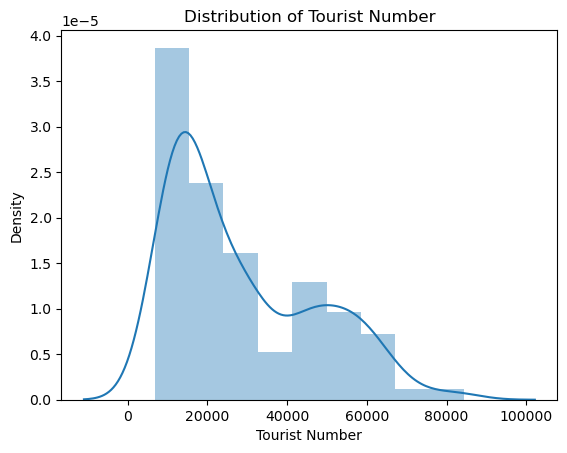

In [32]:
# create a distribution plot using seaborn
sns.distplot(df['TouristNumber'])

# set the title and axis labels
plt.title('Distribution of Tourist Number')
plt.xlabel('Tourist Number')

# display the plot
plt.show()

In [33]:
# 5. Draw rolling mean plot for tourist number

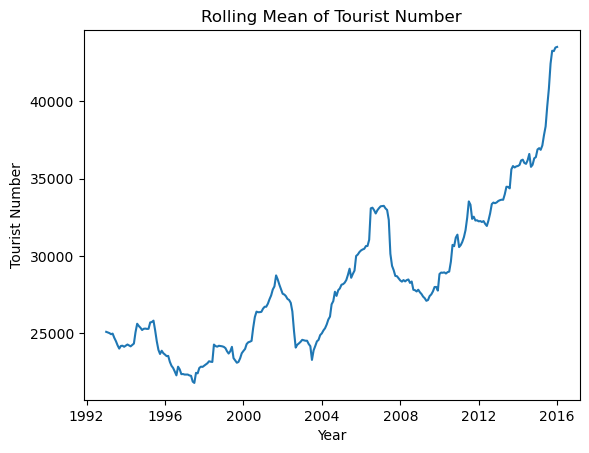

In [34]:
# calculate the rolling mean with a window of 12 months
rolling_mean = df.rolling(window=12).mean()

# create a line plot of the rolling mean
plt.plot(df.index, rolling_mean['TouristNumber'])

# set the title and axis labels
plt.title('Rolling Mean of Tourist Number')
plt.xlabel('Year')
plt.ylabel('Tourist Number')

# display the plot
plt.show()

In [35]:
# 6. Draw rolling standard deviation for the plot

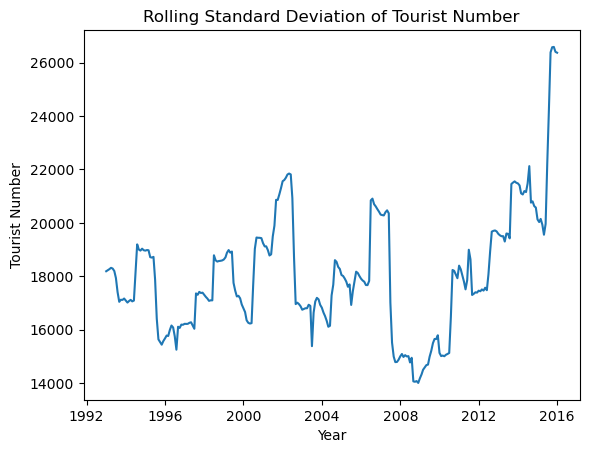

In [36]:
# calculate the rolling standard deviation with a window of 12 months
rolling_std = df.rolling(window=12).std()

# create a line plot of the rolling standard deviation
plt.plot(df.index, rolling_std['TouristNumber'])

# set the title and axis labels
plt.title('Rolling Standard Deviation of Tourist Number')
plt.xlabel('Year')
plt.ylabel('Tourist Number')

# display the plot
plt.show()

In [37]:
# we can see from the rolling mean and rolling std dev plots
# that the data is not stationary

In [38]:
# Setting null hypothesis and alternate hypthesis to verify if the data
# is stationary or not

# Ho: Time series data is non-stationary
# H1: Time series data is stationary

In [40]:
# perform the ADF test on the 'TouristNumber' column
result = adfuller(df['TouristNumber'])

# print the test statistic and p-value
print(f'Test Statistic: {result[0]}')
print(f'p-value: {result[1]}')

Test Statistic: 1.2474703429336202
p-value: 0.9962979950836333


In [41]:
# Since the p-value is greater than 0.05, we can not reject Ho. Therefore
# the data is non-stationary.

In [43]:
# We will convert the time series data to stationary data by the 
# process of differencing

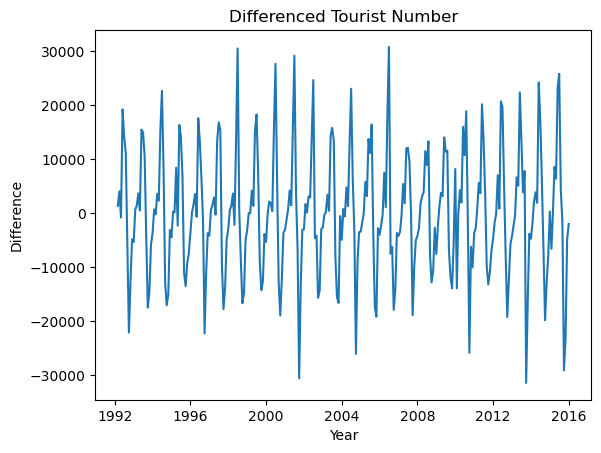

In [44]:
# take the first difference of the 'TouristNumber' column
diff = df['TouristNumber'].diff().dropna()

# plot the differenced data
plt.plot(diff)
plt.title('Differenced Tourist Number')
plt.xlabel('Year')
plt.ylabel('Difference')
plt.show()

In [46]:
# performing adfuller test again to see if the series is stationary or 
# not

# perform the ADF test on the differenced data
result = adfuller(diff)

# print the test statistic and p-value
print(f'Test Statistic: {result[0]}')
print(f'p-value: {result[1]}')


Test Statistic: -8.170180333920072
p-value: 8.665017597612557e-13


In [48]:
# we can see that from P-value that it is less than 0.05, so H0 is now
# rejected, therefore Series is now stationary

In [50]:
# performing rolling mean and rolling std dev to prove that series is
# stationary

In [59]:
df2= diff.to_frame()

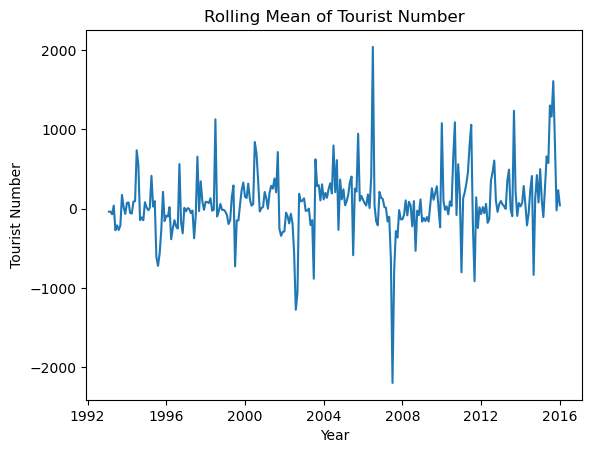

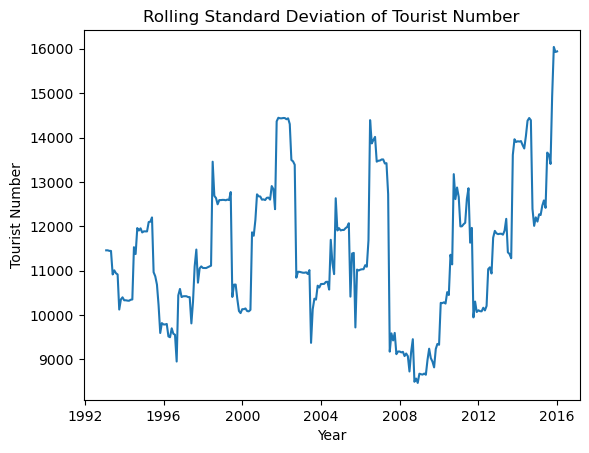

In [66]:
# calculate the rolling mean with a window of 12 months
rolling_mean = df2.rolling(window=12).mean()

# create a line plot of the rolling mean
plt.plot(df2.index, rolling_mean['TouristNumber'])

# set the title and axis labels
plt.title('Rolling Mean of Tourist Number')
plt.xlabel('Year')
plt.ylabel('Tourist Number')

# display the plot
plt.show()



# calculate the rolling standard deviation with a window of 12 months
rolling_std = df2.rolling(window=12).std()

# create a line plot of the rolling standard deviation
plt.plot(df2.index, rolling_std['TouristNumber'])

# set the title and axis labels
plt.title('Rolling Standard Deviation of Tourist Number')
plt.xlabel('Year')
plt.ylabel('Tourist Number')

# display the plot
plt.show()

In [67]:
# we can see from the plots that the time series data is stationary now

In [70]:
# 7. Now that the time series data is stationary, we can decompose the 
# series into season, cycle, trend and error

# Seasonal decompress can be done in two types of models:
# (a) Additive
# (b) Multitative

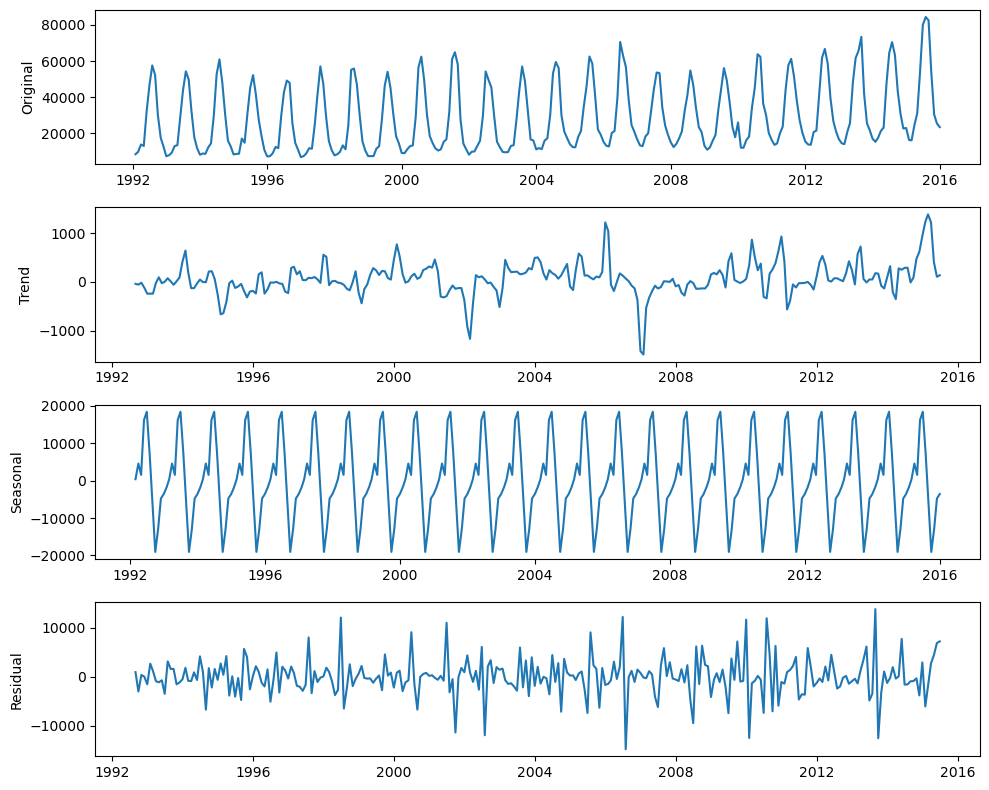

In [74]:
# (A) Additive

# apply the seasonal decomposition and obtain the components
decomposition = seasonal_decompose(df2, model='additive', period=12)

# extract the components from the decomposition object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# plot the original time series data and its components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df)
plt.ylabel('Original')

plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonal')

plt.subplot(414)
plt.plot(residual)
plt.ylabel('Residual')

plt.tight_layout()
plt.show()

In [78]:
# (B) Multitative

# apply the seasonal decomposition and obtain the components
decomposition_mul = seasonal_decompose(df2, model='multiplicative', period=12)

# extract the components from the decomposition object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# plot the original time series data and its components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df)
plt.ylabel('Original')

plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonal')

plt.subplot(414)
plt.plot(residual)
plt.ylabel('Residual')

plt.tight_layout()
plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [80]:
transformed_data = np.log10(df2)

/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


In [81]:
transformed_data

,TouristNumber
ds,
1992-02-29,3.131298
1992-03-31,3.606166
1992-04-30,NaN
1992-05-31,4.283369
1992-06-30,4.152074
...,...
2015-08-31,NaN
2015-09-30,NaN
2015-10-31,NaN


In [83]:
# Multiplitative model requires all the values to be non zero and
# non- negaive, using log transform makes the values NaN because the
# logarithmic function is not defined for negative values.

# We will have to think of something else for multiplitative model, as
# of now we will proceed with additive model only.

/Users/pratikhotchandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


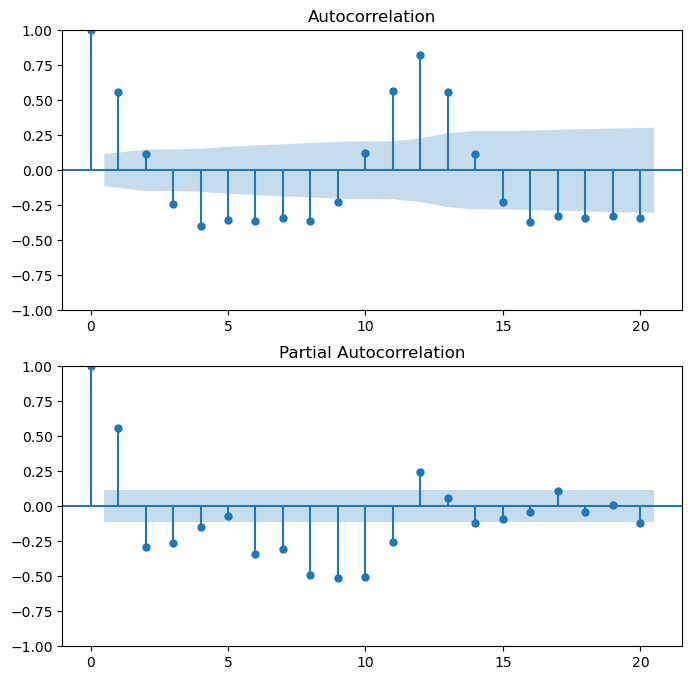

In [86]:
# 8. Plotting ACF, PCF for the differencing data


# Plot ACF and PACF of differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(df2, ax=ax1, lags=20)
plot_pacf(df2, ax=ax2, lags=20)
plt.show()

In [87]:
# 9. Now we will try to create ARIMA model for time series data

# a. Split the data into test and train.

In [88]:
# Define the percentage of data to use for training
train_pct = 0.8

# Split the data into training and test sets
train_size = int(len(df2) * train_pct)
train, test = df2.iloc[:train_size], df2.iloc[train_size:]

print('Training set shape:', train.shape)
print('Test set shape:', test.shape)

Training set shape: (229, 1)
Test set shape: (58, 1)


In [89]:
# b. Now that we have split the data, we will create ARIMA models for
# different p,d and q values. 

In [108]:
# Define the p, d, and q values for the ARIMA model
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Fit the ARIMA model on the differenced data for each combination of p, d, and q values
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = sm.tsa.ARIMA(df2, order=(p, d, q)).fit()
                print('ARIMA({}, {}, {}) AIC: {:.2f}'.format(p, d, q, model.aic))
            except:
                continue

In [92]:
p_values

range(0, 3)

In [93]:

d_values

range(0, 2)

In [94]:

q_values

range(0, 3)

In [112]:
def evaluate_arima_model(X,y,arima_order):
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y,predictions))
    return rmse

In [113]:
def evaluate_models(dataset,test,p_values,d_values,q_values):
    dataset = dataset.astype('float32')
    best_score,best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('Arima%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg,best_score))
    

In [114]:
evaluate_models(train,test,p_values,d_values,q_values)

Best ARIMANone RMSE=inf


In [115]:
history = [x for x in train]
history

['TouristNumber']

In [ ]:
order = (1,1,2)
model = ARIMA(history, order=order)


In [117]:
train2 = train
train2

,TouristNumber
ds,
1992-02-29,1353.0
1992-03-31,4038.0
1992-04-30,-818.0
1992-05-31,19203.0
1992-06-30,14193.0
...,...
2010-10-31,-6266.0
2010-11-30,-10060.0
2010-12-31,-3728.0


In [121]:
dataset = train.astype('float32')

dataset

,TouristNumber
ds,
1992-02-29,1353.0
1992-03-31,4038.0
1992-04-30,-818.0
1992-05-31,19203.0
1992-06-30,14193.0
...,...
2010-10-31,-6266.0
2010-11-30,-10060.0
2010-12-31,-3728.0
